<a href="https://colab.research.google.com/github/Frank6496/Unsupervised-Learning-Recommender-Systems/blob/main/recommender_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A MOVIE RECOMMENDER SYSTEM PREDICT EDSA PROJECT

### Project Members
1. Francis Njoroge Muthoni - Data Science EDSA
2. Jamie Snyder - Project Team Lead



In [3]:
!pip install comet_ml

In [4]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="jNrV8ZnznH518uQ5vfYKXHYrZ",
    project_name="a-recommender-system-project",
    workspace="frank6496",
)

# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.5,
    "steps": 100000,
    "batch_size": 50,
}
experiment.log_parameters(hyper_params)

# Or report single hyperparameters:
hidden_layer_size = 50
experiment.log_parameter("hidden_layer_size", hidden_layer_size)

# Long any time-series metrics:
train_accuracy = 3.14
experiment.log_metric("accuracy", train_accuracy, step=0)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/frank6496/a-recommender-system-project/21bb97b0474f4590888400637d9cbe40



In [5]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

# Kaggle setup

In [7]:
#Kaggle setup
! pip install -q kaggle

from google.colab import  files

files.upload()

#Creating a kaggle folder for our data
!mkdir ~/.kaggle

#Copying the downloaded kaggle.json file to a new folder
! cp kaggle.json ~/.kaggle/

#Granting permissions for copying it in our root folder
! chmod 600  ~/.kaggle/kaggle.json

#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/ankanhore545/cost-of-living-index-2022                           Cost of Living Index 2022                          176KB  2022-03-26 04:56:04           2112         30  1.0              
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              2KB  2022-04-07 09:53:48           5900        353  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease

# Downloading the data from kaggle for our project

In [8]:
#Downloading the dataset from kaggle competitions
! kaggle competitions download -c 'edsa-movie-recommendation-wilderness'

edsa-movie-recommendation-wilderness.zip: Skipping, found more recently modified local copy (use --force to force download)


unzipping out our downloaded files

In [ ]:
#Unziping my datasets
! mkdir datasets
!unzip edsa-movie-recommendation-wilderness.zip -d datasets

mkdir: cannot create directory ‘datasets’: File exists
Archive:  edsa-movie-recommendation-wilderness.zip
replace datasets/genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Loading our dataset using pandas
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
tags = pd.read_csv('datasets/tags.csv')
links = pd.read_csv('datasets/links.csv')
imdb_data = pd.read_csv('datasets/imdb_data.csv')
movies = pd.read_csv('datasets/movies.csv')
genome_tags = pd.read_csv('datasets/genome_tags.csv')
genome_score = pd.read_csv('datasets/genome_scores.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

Viewing our data to understand their structures

In [ ]:
train.head()

In [ ]:
test.head()

In [19]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [20]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [21]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [24]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [25]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


# Exploratory Data Analysis (E.D.A)

**_Exploring our datasets_**

To get a feeling of the data you we are working with, it helps to play around a little and create some quick stats and graphs for different aspects of it. This will help you have a better overview of what the data is about. And since I want to find out how well movies are liked or disliked, the most important variable is the movie rating. Let’s see its distribution

In [26]:
!pip install pandas_profiling

In [44]:
# import pandas_profiling

In [ ]:
# pandas_profiling.ProfileReport([train], axis=1)

In [27]:
!pip install dabl

In [28]:
import dabl

1. Exploring the train dataset

In [93]:
# checking the shape of our dataset
train.shape

(10000038, 4)

In [94]:
dabl.clean(train, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    1
categorical     0
date            0
free_string     0
useless         0
dtype: int64


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [88]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [89]:
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

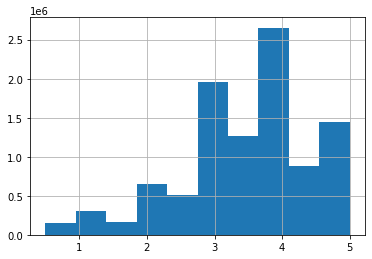

In [95]:
# let’s look at a visual representation of the data by creating a histogram
train['rating'].hist(bins=10)

Target looks like regression


KeyboardInterrupt: ignored

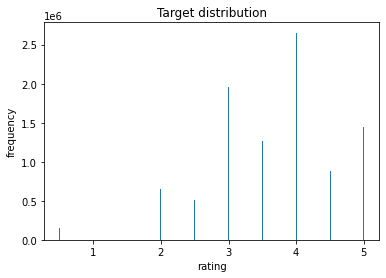

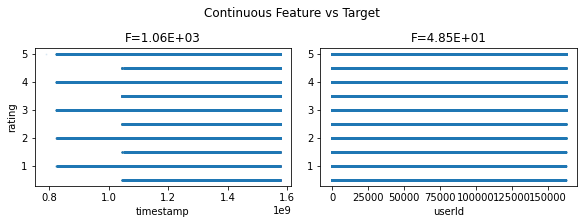

In [91]:
dabl.plot(train, target_col="rating")

In [32]:
# checking the summary of our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [59]:
print("Missing values in our Train dataset: ")
print(str(train.isnull().sum()))

Missing values in our Train dataset: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [99]:
# merging our train and movie datasets together
movies_rating = (train.set_index("movieId").join(movies.set_index("movieId"), how="left"))

movies_rating.head()

,userId,rating,timestamp,title,genres
movieId,,,,,
1,158849,5.0,994716786,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,97203,5.0,942683155,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,161871,3.0,833104576,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,45117,4.0,1442256969,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,27431,5.0,849667827,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [100]:
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


You can concatenate these dummies to the original movies_rating data frame

In [2]:
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis=1).drop(["timestamp", "genres"], axis=1))

tidy_movie_ratings.head()

NameError: ignored

2. Exploring the Test dataset

In [34]:
test_clean = dabl.clean(test, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    1
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [35]:
test.shape

(5000019, 2)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [60]:
print("Missing values in our Test dataset: ")
print(str(test.isnull().sum()))

Missing values in our Test dataset: 
userId     0
movieId    0
dtype: int64


3. Exploring the tag dataset

In [37]:
tags_clean = dabl.clean(tags, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         0
dtype: int64


In [38]:
tags.shape

(1093360, 4)

In [39]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [61]:
print("Missing values in our Tags dataset: ")
print(str(tags.isnull().sum()))

Missing values in our Tags dataset: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


4. Exploring the links dataset

In [40]:
links_clean = dabl.clean(links, verbose=1)

Detected feature types:
continuous      3
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [41]:
links.shape

(62423, 3)

In [42]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [62]:
print("Missing values in our Links dataset: ")
print(str(links.isnull().sum()))

Missing values in our Links dataset: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64


In [68]:
# dropping missing rows in our links dataset
links.dropna(axis=0,inplace=True)

5. Exploring the imdb dataset

In [43]:
imdb_data_clean = dabl.clean(imdb_data, verbose=1)

Detected feature types:
continuous      2
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     4
useless         0
dtype: int64


In [44]:
imdb_data.shape

(27278, 6)

In [45]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [63]:
print("Missing values in our IMDB_DATA dataset: ")
print(str(imdb_data.isnull().sum()))

Missing values in our IMDB_DATA dataset: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


6. Exploring the movies dataset

In [46]:
movies_clean = dabl.clean(movies, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     2
useless         0
dtype: int64


In [47]:
movies.shape

(62423, 3)

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [64]:
print("Missing values in our Movies dataset: ")
print(str(movies.isnull().sum()))

Missing values in our Movies dataset: 
movieId    0
title      0
genres     0
dtype: int64


7. Exploring the genome_tags dataset

In [49]:
genome_tags_clean = dabl.clean(genome_tags, verbose=1)

Detected feature types:
continuous      0
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         1
dtype: int64


In [50]:
genome_tags.shape

(1128, 2)

In [51]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [65]:
print("Missing values in our Genome_tags dataset: ")
print(str(genome_tags.isnull().sum()))

Missing values in our Genome_tags dataset: 
tagId    0
tag      0
dtype: int64


8. Exploring the genome_score dataset

In [52]:
genome_score_clean = dabl.clean(genome_score, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    2
categorical     0
date            0
free_string     0
useless         0
dtype: int64


In [53]:
genome_score.shape

(15584448, 3)

In [54]:
genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [66]:
print("Missing values in our Genome_scores dataset: ")
print(str(genome_score.isnull().sum()))

Missing values in our Genome_scores dataset: 
movieId      0
tagId        0
relevance    0
dtype: int64


9. Exploring the sample submission dataset

In [55]:
sample_submission_clean = dabl.clean(sample_submission, verbose=1)

Detected feature types:
continuous      0
dirty_float     0
low_card_int    0
categorical     0
date            0
free_string     1
useless         1
dtype: int64


In [56]:
sample_submission.shape

(5000019, 2)

In [57]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


Evaluating the rating counts of users in our dataset

In [81]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(10,8))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="green")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
        plt.title(f'Top {n} Users by Number of Ratings', fontsize=16)
        plt.xlabel('User ID')
        plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 49658 
Total number of movies:		 48213


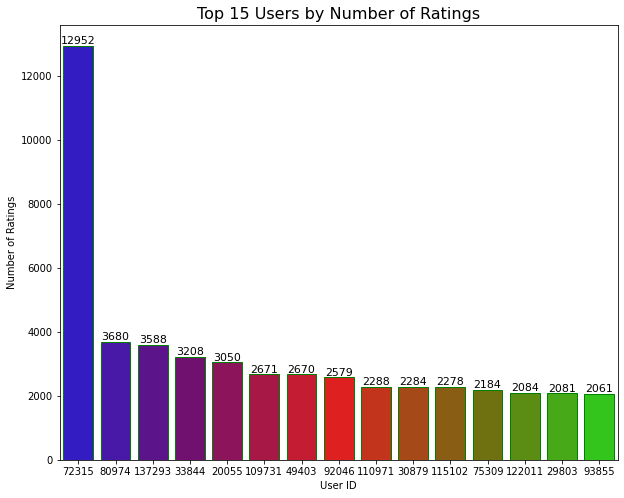

In [82]:
user_ratings_count(train, 15)

In [83]:
# Counting the number of times a specific rating has been rated.
train_rating = pd.DataFrame(
    train['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


In [86]:
import plotly.express as px
#Visualize the Distribution of Ratings
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()